In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import ceil
%matplotlib inline

In [2]:
df = pd.read_csv('sample_data.csv')
df = df.set_index(['depth'])
df.head()

,force
depth,
0.000000,202.765332
0.366667,203.458784
0.766667,206.802214
1.133333,206.802214
1.533333,203.458784


In [3]:
idx = pd.Index(np.arange(0, ceil(df.index.values.max()), 0.5))
newIdx = idx.union(df.index)
dfR = df.reindex(newIdx).interpolate(method='index')
dfR = dfR.reindex(idx)
dfR.index.name = 'depth'
dfR.tail()

,force
depth,
10.5,198.059765
11.0,198.059765
11.5,196.326134
12.0,199.215524
12.5,203.260655


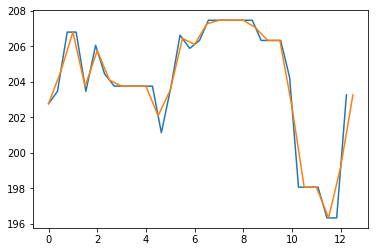

In [4]:
fig=plt.figure()
plt.plot(df)
plt.plot(dfR)
plt.show()

In [5]:
df2 = 1.1*dfR
df2.head()

,force
depth,
0.0,223.041865
0.5,225.030584
1.0,227.482435
1.5,224.111140
2.0,226.343192


In [6]:
holderName = input("Name of the specimen holder: ")
dfR = pd.DataFrame(pd.concat((dfR, df2), axis=1).mean(axis=1), columns=[holderName])
dfR.head()

Name of the specimen holder: qwwq


,qwwq
depth,
0.0,212.903599
0.5,214.801921
1.0,217.142325
1.5,213.924270
2.0,216.054865


In [7]:
dfNew = dfR * 1.2
mu, sigma = 0, 1 

# Noise is added to differentiate between the signals for the demo
noise = np.random.normal(mu, sigma, 26)

newName = 'holder2'
dfR[newName] = dfNew[dfNew.columns[0]]
dfR[newName] = dfR[newName] + noise
dfR.head()

,qwwq,holder2
depth,,
0.0,212.903599,255.116410
0.5,214.801921,258.885049
1.0,217.142325,260.036009
1.5,213.924270,258.238838
2.0,216.054865,258.917755


In [8]:
# Täällä pitäis kattoo onko olemassa olevaa fileä olemassa, jos ei, luo se.
# Jos file on jo olemmassa ja siitä löytyy saman niminen kolumni, poista se. 
# Lisää uusi df kolumniksi filestä luettuun ja tallenna se.
dfR.to_pickle('testSave')
dfR.to_csv('testCSV.csv', header=True)

In [9]:
dfMean = pd.read_pickle('Software/specimenHolderTestData')
df1 = pd.read_pickle('Software/2019-04-18 20:17:58.419830_specimen_holder')
df2 = pd.read_pickle('Software/2019-04-18 20:19:24.608875_specimen_holder')
df3 = pd.read_pickle('Software/2019-04-18 20:20:50.786323_specimen_holder')
dfMean.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Software/specimenHolderTestData'

In [ ]:
fig=plt.figure()
plt.plot(df1)
plt.plot(df2)
plt.plot(df3)
plt.plot(dfMean)
plt.show()